In [110]:
%load_ext autoreload
%autoreload 2

import json
import numpy as np
from pbo.utils.confidence_interval import confidence_interval

experiment_name = "test"
show_fqi = True; show_lspi = False; show_pbo_linear = True; show_pbo_max_linear = True; 
show_pbo_deep = True; show_pbo_optimal = True
max_bellman_iterations = 15
max_bellman_iterations_validation = max_bellman_iterations + 50
seeds = range(1, 21)
iteration_bars = [max_bellman_iterations, max_bellman_iterations + 4, max_bellman_iterations + 9]

p = json.load(open(f"figures/{experiment_name}/parameters.json"))

n_seeds = len(seeds)
ticks_freq = 3
n_actions = 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Extract data

In [111]:
if show_fqi:
    fqi_q = np.zeros((len(seeds), max_bellman_iterations + 1, p["n_states"], n_actions))
    fqi_v = np.zeros((len(seeds), max_bellman_iterations + 1, p["n_states"]))

    for idx_seed, seed in enumerate(seeds):
        fqi_q[idx_seed] = np.load(f"figures/{experiment_name}/FQI/{max_bellman_iterations}_Q_{seed}.npy")
        fqi_v[idx_seed] = np.load(f"figures/{experiment_name}/FQI/{max_bellman_iterations}_V_{seed}.npy")

if show_lspi:
    lspi_q = np.load(f"figures/{experiment_name}/LSPI/{max_bellman_iterations}_Q.npy")
    lspi_v = np.load(f"figures/{experiment_name}/LSPI/{max_bellman_iterations}_V.npy")

optimal_q = np.load(f"figures/data/optimal/Q.npy")
optimal_v = np.load(f"figures/data/optimal/V.npy")

if show_pbo_linear:
    pbo_linear_q = np.zeros((len(seeds), max_bellman_iterations_validation + 2, p["n_states"], n_actions))
    pbo_linear_v = np.zeros((len(seeds), max_bellman_iterations_validation + 2, p["n_states"]))

    for idx_seed, seed in enumerate(seeds):
        pbo_linear_q[idx_seed] = np.load(f"figures/{experiment_name}/PBO_linear/{max_bellman_iterations}_Q_{seed}.npy")
        pbo_linear_v[idx_seed] = np.load(f"figures/{experiment_name}/PBO_linear/{max_bellman_iterations}_V_{seed}.npy")

if show_pbo_max_linear:
    pbo_max_linear_q = np.zeros((len(seeds), max_bellman_iterations_validation + 1, p["n_states"], n_actions))
    pbo_max_linear_v = np.zeros((len(seeds), max_bellman_iterations_validation + 1, p["n_states"]))

    for idx_seed, seed in enumerate(seeds):
        pbo_max_linear_q[idx_seed] = np.load(f"figures/{experiment_name}/PBO_max_linear/{max_bellman_iterations}_Q_{seed}.npy")
        pbo_max_linear_v[idx_seed] = np.load(f"figures/{experiment_name}/PBO_max_linear/{max_bellman_iterations}_V_{seed}.npy")

if show_pbo_deep:
    pbo_deep_q = np.zeros((len(seeds), max_bellman_iterations_validation + 1, p["n_states"], n_actions))
    pbo_deep_v = np.zeros((len(seeds), max_bellman_iterations_validation + 1, p["n_states"]))

    for idx_seed, seed in enumerate(seeds):
        pbo_deep_q[idx_seed] = np.load(f"figures/{experiment_name}/PBO_deep/{max_bellman_iterations}_Q_{seed}.npy")
        pbo_deep_v[idx_seed] = np.load(f"figures/{experiment_name}/PBO_deep/{max_bellman_iterations}_V_{seed}.npy")

if show_pbo_optimal:
    pbo_optimal_q = np.load(f"figures/{experiment_name}/PBO_optimal/{max_bellman_iterations}_Q.npy")
    pbo_optimal_v = np.load(f"figures/{experiment_name}/PBO_optimal/{max_bellman_iterations}_V.npy")

### Distances with the optimal Q function

In [112]:
if show_fqi:
    fqi_q_mean = np.sqrt(np.mean(np.square(fqi_q - optimal_q), axis=(2, 3))).mean(axis=0)
    fqi_q_std = np.sqrt(np.mean(np.square(fqi_q - optimal_q), axis=(2, 3))).std(axis=0)
    fqi_q_confidence_interval = confidence_interval(fqi_q_mean, fqi_q_std, len(seeds))

if show_lspi:
    lspi_q_mean = np.sqrt(np.mean(np.square(lspi_q - optimal_q), axis=(1, 2)))

if show_pbo_linear:
    pbo_linear_q_mean = np.sqrt(np.mean(np.square(pbo_linear_q - optimal_q), axis=(2, 3))).mean(axis=0)
    pbo_linear_q_std = np.sqrt(np.mean(np.square(pbo_linear_q - optimal_q), axis=(2, 3))).std(axis=0)
    pbo_linear_q_confidence_interval = confidence_interval(pbo_linear_q_mean, pbo_linear_q_std, len(seeds))

if show_pbo_max_linear:
    pbo_max_linear_q_mean = np.sqrt(np.mean(np.square(pbo_max_linear_q - optimal_q), axis=(2, 3))).mean(axis=0)
    pbo_max_linear_q_std = np.sqrt(np.mean(np.square(pbo_max_linear_q - optimal_q), axis=(2, 3))).std(axis=0)
    pbo_max_linear_q_confidence_interval = confidence_interval(pbo_max_linear_q_mean, pbo_max_linear_q_std, len(seeds))

if show_pbo_deep:
    pbo_deep_q_mean = np.sqrt(np.mean(np.square(pbo_deep_q - optimal_q), axis=(2, 3))).mean(axis=0)
    pbo_deep_q_std = np.sqrt(np.mean(np.square(pbo_deep_q - optimal_q), axis=(2, 3))).std(axis=0)
    pbo_deep_q_confidence_interval = confidence_interval(pbo_deep_q_mean, pbo_deep_q_std, len(seeds))

if show_pbo_optimal:
    pbo_optimal_q_mean = np.sqrt(np.mean(np.square(pbo_optimal_q - optimal_q), axis=(1, 2)))

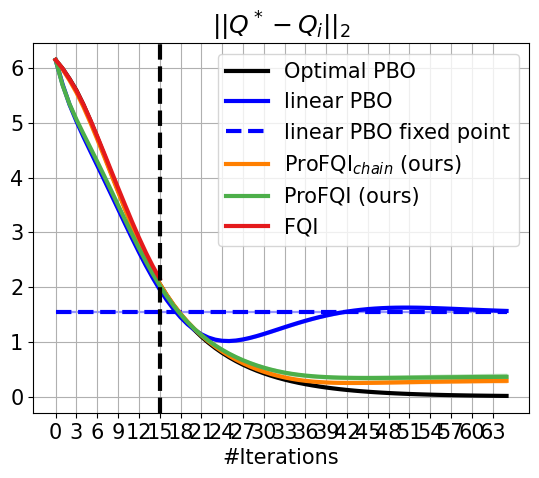

In [113]:
import matplotlib.pyplot as plt 
from experiments import colors

plt.rc("font", size=15)
plt.rc("lines", linewidth=3)

iterations = range(max_bellman_iterations + 1)
iterations_validation = range(max_bellman_iterations_validation + 1)

if show_pbo_optimal:
    plt.plot(iterations_validation, pbo_optimal_q_mean, label="Optimal PBO", color="black")

if show_pbo_linear:
    plt.plot(iterations_validation, pbo_linear_q_mean[:-1], label="linear PBO", color="blue")
    plt.fill_between(iterations_validation, pbo_linear_q_confidence_interval[0, :-1], pbo_linear_q_confidence_interval[1, :-1], color="blue", alpha=0.3)

    plt.hlines(pbo_linear_q_mean[-1], 0, max_bellman_iterations_validation, color="blue", linestyle="--", label="linear PBO fixed point")
    plt.fill_between(iterations_validation, pbo_linear_q_confidence_interval[0, -1], pbo_linear_q_confidence_interval[1, -1], color="blue", alpha=0.3)

if show_pbo_max_linear:
    plt.plot(iterations_validation, pbo_max_linear_q_mean, label="ProFQI$_{chain}$ (ours)", color=colors["orange"])
    plt.fill_between(iterations_validation, pbo_max_linear_q_confidence_interval[0], pbo_max_linear_q_confidence_interval[1], color=colors["orange"], alpha=0.3)

if show_pbo_deep:
    plt.plot(iterations_validation, pbo_deep_q_mean, label="ProFQI (ours)", color=colors["ProFQI"])
    plt.fill_between(iterations_validation, pbo_deep_q_confidence_interval[0], pbo_deep_q_confidence_interval[1], color=colors["ProFQI"], alpha=0.3)

if show_fqi:
    plt.plot(iterations, fqi_q_mean, label="FQI", color=colors["FQI"])
    plt.fill_between(iterations, fqi_q_confidence_interval[0], fqi_q_confidence_interval[1], color=colors["FQI"], alpha=0.3)

if show_lspi:
    plt.plot(iterations, lspi_q_mean, label="LSPI", color=colors["LSPI"])

plt.axvline(max_bellman_iterations, color="black", linestyle="--")
plt.xticks(range(0, max_bellman_iterations_validation + 1, ticks_freq))
plt.xlabel("#Iterations")
plt.title("$|| Q^* - Q_i ||_2$")
plt.legend()
plt.grid(zorder=0)
_ = plt.savefig(f"figures/{experiment_name}/Q_{max_bellman_iterations}.pdf", bbox_inches='tight')

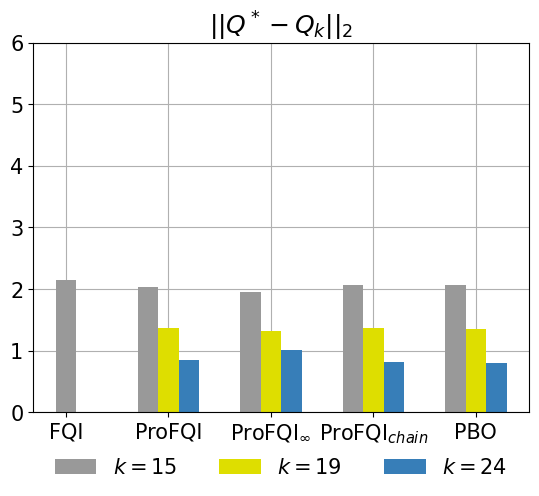

In [114]:
import matplotlib.pyplot as plt 
from experiments import colors

plt.rc("font", size=15)
plt.rc("lines", linewidth=3)

x_label = []
x_position = 0
bar_size = 0.2

if show_fqi:
    plt.bar([x_position], [fqi_q_mean[iteration_bars[0]]], width=bar_size, color=colors["grey"], zorder=2)
    x_position += 1
    x_label.append("FQI")

if show_lspi:
    plt.bar([x_position], [lspi_q_mean[iteration_bars[0]]], width=bar_size, color=colors["grey"], zorder=2)
    x_position += 1
    x_label.append("LSPI")

if show_pbo_deep:
    plt.bar([x_position - bar_size], [pbo_deep_q_mean[iteration_bars[0]]], width=bar_size, color=colors["grey"], zorder=2)
    plt.bar([x_position], [pbo_deep_q_mean[iteration_bars[1]]], width=bar_size, color=colors["yellow"], zorder=2)
    plt.bar([x_position + bar_size], [pbo_deep_q_mean[iteration_bars[2]]], width=bar_size, color=colors["blue"], zorder=2)
    x_position += 1
    x_label.append("ProFQI")

if show_pbo_linear:
    plt.bar([x_position - bar_size], [pbo_linear_q_mean[iteration_bars[0]]], width=bar_size, color=colors["grey"], zorder=2)
    plt.bar([x_position], [pbo_linear_q_mean[iteration_bars[1]]], width=bar_size, color=colors["yellow"], zorder=2)
    plt.bar([x_position + bar_size], [pbo_linear_q_mean[iteration_bars[2]]], width=bar_size, color=colors["blue"], zorder=2)
    x_position += 1
    x_label.append("ProFQI$_{\infty}$")

if show_pbo_max_linear:
    plt.bar([x_position - bar_size], [pbo_max_linear_q_mean[iteration_bars[0]]], width=bar_size, color=colors["grey"], zorder=2)
    plt.bar([x_position], [pbo_max_linear_q_mean[iteration_bars[1]]], width=bar_size, color=colors["yellow"], zorder=2)
    plt.bar([x_position + bar_size], [pbo_max_linear_q_mean[iteration_bars[2]]], width=bar_size, color=colors["blue"], zorder=2)
    x_position += 1
    x_label.append("ProFQI$_{chain}$")

if show_pbo_optimal:
    plt.bar([x_position - bar_size], [pbo_optimal_q_mean[iteration_bars[0]]], width=bar_size, label=f"$k = {iteration_bars[0]}$", color=colors["grey"], zorder=2)
    plt.bar([x_position], [pbo_optimal_q_mean[iteration_bars[1]]], width=bar_size, label=f"$k = {iteration_bars[1]}$", color=colors["yellow"], zorder=2)
    plt.bar([x_position + bar_size], [pbo_optimal_q_mean[iteration_bars[2]]], width=bar_size, label=f"$k = {iteration_bars[2]}$", color=colors["blue"], zorder=2)
    x_position += 1
    x_label.append("PBO")

plt.title("$|| Q^* - Q_k ||_2$")
plt.xticks(range(x_position), x_label)
plt.ylim(0, 6)
plt.legend(loc="center", bbox_to_anchor=(0.5, -0.15), ncol=len(iteration_bars), frameon=False)
plt.grid(zorder=0)
_ = plt.savefig(f"figures/{experiment_name}/Q_bar_{max_bellman_iterations}.pdf", bbox_inches='tight')

### Distances with the optimal V function

In [115]:
if show_fqi:
    fqi_v_mean = np.sqrt(np.mean(np.square(fqi_v - optimal_v), axis=2)).mean(axis=0)
    fqi_v_std = np.sqrt(np.mean(np.square(fqi_v - optimal_v), axis=2)).std(axis=0)
    fqi_v_confidence_interval = confidence_interval(fqi_v_mean, fqi_v_std, len(seeds))

if show_lspi:
    lspi_v_mean = np.sqrt(np.mean(np.square(lspi_v - optimal_v), axis=1))

if show_pbo_linear:
    pbo_linear_v_mean = np.sqrt(np.mean(np.square(pbo_linear_v - optimal_v), axis=2)).mean(axis=0)
    pbo_linear_v_std = np.sqrt(np.mean(np.square(pbo_linear_v - optimal_v), axis=2)).std(axis=0)
    pbo_linear_v_confidence_interval = confidence_interval(pbo_linear_v_mean, pbo_linear_v_std, len(seeds))

if show_pbo_max_linear:
    pbo_max_linear_v_mean = np.sqrt(np.mean(np.square(pbo_max_linear_v - optimal_v), axis=2)).mean(axis=0)
    pbo_max_linear_v_std = np.sqrt(np.mean(np.square(pbo_max_linear_v - optimal_v), axis=2)).std(axis=0)
    pbo_max_linear_v_confidence_interval = confidence_interval(pbo_max_linear_v_mean, pbo_max_linear_v_std, len(seeds))

if show_pbo_deep:
    pbo_deep_v_mean = np.sqrt(np.mean(np.square(pbo_deep_v - optimal_v), axis=2)).mean(axis=0)
    pbo_deep_v_std = np.sqrt(np.mean(np.square(pbo_deep_v - optimal_v), axis=2)).std(axis=0)
    pbo_deep_v_confidence_interval = confidence_interval(pbo_deep_v_mean, pbo_deep_v_std, len(seeds))

if show_pbo_optimal:
    pbo_optimal_v_mean = np.sqrt(np.mean(np.square(pbo_optimal_v - optimal_v), axis=1))

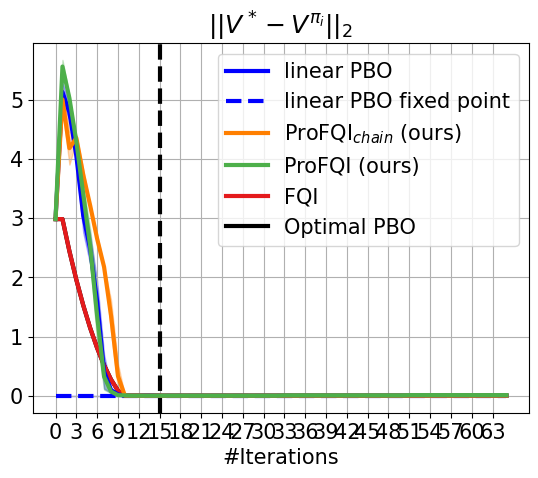

In [116]:
import matplotlib.pyplot as plt 
from experiments import colors

plt.rc("font", size=15)
plt.rc("lines", linewidth=3)

iterations = range(max_bellman_iterations + 1)
iterations_validation = range(max_bellman_iterations_validation + 1)

if show_pbo_linear:
    plt.plot(iterations_validation, pbo_linear_v_mean[:-1], label="linear PBO", color="blue", zorder=7)
    plt.fill_between(iterations_validation, pbo_linear_v_confidence_interval[0, :-1], pbo_linear_v_confidence_interval[1, :-1], color="blue", alpha=0.3)

    plt.hlines(pbo_linear_v_mean[-1], 0, max_bellman_iterations_validation, color="blue", linestyle="--", label="linear PBO fixed point", zorder=3)
    plt.fill_between(iterations_validation, pbo_linear_v_confidence_interval[0, -1], pbo_linear_v_confidence_interval[1, -1], color="blue", alpha=0.3)

if show_pbo_max_linear:
    plt.plot(iterations_validation, pbo_max_linear_v_mean, label="ProFQI$_{chain}$ (ours)", color=colors["orange"], zorder=8)
    plt.fill_between(iterations_validation, pbo_max_linear_v_confidence_interval[0], pbo_max_linear_v_confidence_interval[1], color=colors["orange"], alpha=0.3)

if show_pbo_deep:
    plt.plot(iterations_validation, pbo_deep_v_mean, label="ProFQI (ours)", color=colors["ProFQI"], zorder=8)
    plt.fill_between(iterations_validation, pbo_deep_v_confidence_interval[0], pbo_deep_v_confidence_interval[1], color=colors["ProFQI"], alpha=0.3)

if show_fqi:
    plt.plot(iterations, fqi_v_mean, label="FQI", color=colors["FQI"], zorder=6)
    plt.fill_between(iterations, fqi_v_confidence_interval[0], fqi_v_confidence_interval[1], color=colors["FQI"], alpha=0.3)

if show_lspi:
    plt.plot(iterations, lspi_v_mean, label="LSPI", color=colors["LSPI"], zorder=5)

if show_pbo_optimal:
    plt.plot(iterations_validation, pbo_optimal_v_mean, label="Optimal PBO", color="black", zorder=4)

plt.axvline(max_bellman_iterations, color="black", linestyle="--", zorder=2)
plt.xticks(range(0, max_bellman_iterations_validation + 1, ticks_freq))
plt.xlabel("#Iterations")

plt.title("$ || V^* - V^{\pi_i} ||_2 $")
plt.legend()
plt.grid(zorder=0)
_ = plt.savefig(f"figures/{experiment_name}/V_{max_bellman_iterations}.pdf", bbox_inches='tight')